## ■ Data Description
* Name : 게임의 이름입니다.
* Platform : 게임이 지원되는 플랫폼의 이름입니다.
* Year : 게임이 출시된 연도입니다.
* Genre : 게임의 장르입니다.
* Publisher : 게임을 제작한 회사입니다.
* NA_Sales : 북미지역에서의 출고량입니다.
* EU_Sales : 유럽지역에서의 출고량입니다.
* JP_Sales : 일본지역에서의 출고량입니다.
* Other_Sales : 기타지역에서의 출고량입니다.

## ■ 필수 포함 내용(분석 내용)
* 지역에 따라서 선호하는 게임 장르가 다를까
* 연도별 게임의 트렌드가 있을까
* 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

## 1. 데이터셋 불러오기

In [1]:
# 1) 데이터셋 불러오기
from google.colab import files
files.upload();

Saving vgames2.csv to vgames2.csv


In [2]:
import pandas as pd
data = pd.read_csv('vgames2.csv',index_col=0)
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## 2. 데이터 확인 및 전처리

In [3]:
# 데이터 shpae 확인
data.shape

(16598, 9)

* vgames2 데이터는 16598행, 9열로 이루어진 데이터임을 확인할 수 있다.

In [4]:
# 데이터 요약 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


* 출고량 관련 변수는 수치형 데이터임에도 불구하고 object 타입으로 되어있는 것을 확인할 수 있다.

In [5]:
# 수치형 데이터가 왜 object 타입으로 되어있는지 확인
data.loc[11]

Name                  Ford Racing
Platform                       PS
Year                       2001.0
Genre                      Racing
Publisher      Empire Interactive
NA_Sales                     480K
EU_Sales                    0.33M
JP_Sales                       0K
Other_Sales                  0.06
Name: 11, dtype: object

* 일부 데이터값의 단위에 'K', 'M'이 포함되어있어 object 타입으로 되어있는 것을 확인할 수 있다. -> 단위 통일 필요함

In [6]:
# 단위와 데이터 타입을 변환해주는 함수 만들기(백만단위(M)으로 맞춰줌)
def k_m(data,column):
  for j in range(0,len(column)):
    for i in range(1,len(data[column[j]])):
      if 'K' in data.loc[i, column[j]]:
        data.loc[i, column[j]] = float(data.loc[i, column[j]].replace('K',''))/(10**3)
      elif 'M' in data.loc[i, column[j]]:
        data.loc[i, column[j]] = float(data.loc[i, column[j]].replace('M',''))
    data[column[j]] = data[column[j]].astype('float')

In [7]:
# 단위 및 데이터타입 변환
k_m(data,['NA_Sales',	'EU_Sales', 'JP_Sales',	'Other_Sales'])

In [8]:
# 데이터 타입 재확인
data.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [9]:
# 단위가 잘 변환 되었는지 확인
data.loc[11]

Name                  Ford Racing
Platform                       PS
Year                       2001.0
Genre                      Racing
Publisher      Empire Interactive
NA_Sales                     0.48
EU_Sales                     0.33
JP_Sales                      0.0
Other_Sales                  0.06
Name: 11, dtype: object

* 단위와 데이터타입이 잘 변환 되었음을 확인할 수 있음

In [10]:
# 중복된 데이터 찾기
data.loc[data.duplicated(keep=False)==True]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8056,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0
9185,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0


* 중복된 데이터가 2개 존재함을 확인 -> 중복된 데이터 제거 필요

In [11]:
# 중복된 데이터 삭제
data = data.drop_duplicates(keep='first',ignore_index=True)

In [12]:
# 중복된 데이터 재확인
data.loc[data.duplicated(keep=False)==True]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [13]:
data.shape

(16597, 9)

* 중복된 데이터 잘 삭제되었음을 확인

In [14]:
# 데이터 기초통계 확인
data.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16327.000000,16597.000000,16597.000000,16597.000000,16597.000000
mean,1994.242543,0.264683,0.146661,0.077785,0.048066
std,155.077168,0.816705,0.505365,0.309300,0.188594
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [15]:
# 결측치 확인
data.isnull().sum()

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

* Year, Genre, Publisher 변수의 결측치 처리가 필요하고, Year변수의 min값이 0인 것으로보아 19nn, 20nn와 같이 4자리로된 년도가 아닌 데이터가 있는것으로 보여 자세한 확인이 필요해보임.

In [16]:
# 결측치를 포함하는 행 추출
condition = ((data['Year'].isnull()) | (data['Genre'].isnull()) | (data['Publisher'].isnull()))
data.loc[condition,:]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0.00,0.00,0.02,0.00
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0.00,0.03,0.00,0.00
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0.00,0.06,0.00,0.01
...,...,...,...,...,...,...,...,...,...
16424,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0.00,0.00,0.00
16430,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0.00,0.00,0.01
16431,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0.00,0.00,0.01
16554,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0.00,0.03,0.00,0.01


In [17]:
print('전체 데이터 중 결측치를 포함하는 데이터 비율 :','%0.1f%%' % ((len(data.loc[condition,:])/len(data))*100))

전체 데이터 중 결측치를 포함하는 데이터 비율 : 2.1%


* 전체 데이터 중 결측치를 포함하는 데이터 비율이 2%로 매우 작은 비율이라 판단하고 결측치를 포함하는 데이터를 제거하기로 함

In [18]:
# 결측치를 포함하는 데이터 제거
data = data.loc[~condition,:].reset_index(drop=True)
data 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


* 데이터가 16241개로 줄어들었음

In [19]:
# 결측치 확인
data.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

* 결측치가 잘 제거되었음을 확인

In [20]:
# Year 변수 확인
pd.DataFrame(data['Year'].unique(),columns=['Year']).sort_values(by='Year').head(25)

,Year
59,0.0
44,1.0
57,2.0
38,3.0
46,4.0
45,5.0
41,6.0
49,7.0
42,8.0
22,9.0


* 1980 이하 데이터들 처리 필요해보임

In [21]:
data.loc[(data['Year']>0) & (data['Year']<1980)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
72,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03
79,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.10,0.07,0.00,0.01
210,NASCAR Unleashed,PS3,11.0,Racing,Activision,0.09,0.00,0.00,0.01
299,Kung Fu Panda: Showdown of Legendary Legends,PS3,15.0,Action,Little Orbit,0.00,0.02,0.00,0.00
758,NASCAR Thunder 2004,PS2,3.0,Racing,Electronic Arts,0.53,0.41,0.00,0.14
...,...,...,...,...,...,...,...,...,...
15493,Theatrhythm Dragon Quest,3DS,15.0,Misc,Square Enix,0.00,0.00,0.15,0.00
15641,Sugoi Hebereke,SNES,94.0,Fighting,Sunsoft,0.00,0.00,0.02,0.00
15756,Fab 5 Soccer,DS,8.0,Sports,Destineer,0.01,0.00,0.00,0.00
15801,Dragon Ball Z: Burst Limit,X360,8.0,Fighting,Atari,0.24,0.18,0.03,0.05


* Year 값이 잘못 입력되어있는 데이터는 97개. 이 중 86 ~ 98은 19nn년도로, 0 ~ 16은 20nn년도로 변환 처리.

In [22]:
# 년도 변환

condition1 = (data['Year']>=0) & (data['Year']<17)
condition2 = (data['Year']>85) & (data['Year']<99)

data.loc[condition1, 'Year'] = data.loc[condition1, 'Year'] + 2000
data.loc[condition2, 'Year'] = data.loc[condition2, 'Year'] + 1900

data['Year'] = data['Year'].astype('int')

In [23]:
# 변환 확인
data.loc[(data['Year']>=0) & (data['Year']<1980)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [24]:
data.Year.describe()

count    16241.000000
mean      2006.406748
std          5.832087
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

* 0 ~ 98로 되어있는 변수 잘 변환 되었음

In [25]:
# 파생변수 : 게임별 총 출고량 변수인 Total_Sales 변수 생성
data['Total_Sales'] = data['NA_Sales'] + data['EU_Sales'] + data['JP_Sales'] + data['Other_Sales']
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [42]:
# 파생변수 : 년도를 5년 단위로 범주화
import warnings
warnings.filterwarnings(action='ignore')

data['Year'] = data['Year'].astype('int')

data2=data.sort_values('Year').reset_index(drop=True)

y = 1980
data2['Year_5'] = ''
for i in range(0,len(data2)):
  if data2['Year'][i]==(y+5):
    y+=5

  if data2['Year'][i] >= 2015:
     data2['Year_5'][i] = '2015~2020'
  elif (data2['Year'][i]>=y) & (data2['Year'][i]<(y+5)):
    data2['Year_5'][i] = str(y)+'~'+str(y+4)
      
data2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Year_5
0,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77,1980~1984
1,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31,1980~1984
2,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76,1980~1984
3,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27,1980~1984
4,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34,1980~1984
...,...,...,...,...,...,...,...,...,...,...,...
16236,Jikkyou Powerful Pro Baseball 2016,PS3,2016,Sports,Konami Digital Entertainment,0.00,0.00,0.11,0.00,0.11,2015~2020
16237,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03,2015~2020
16238,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01,2015~2020
16239,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01,2015~2020


In [27]:
#tidy data 만들기
NA = data2[['Name','Platform','Year','Year_5','Genre','Publisher','NA_Sales']].rename(columns = {'NA_Sales' : 'Sales'}).reset_index(drop=True)
NA['Region'] = 'NA'
EU = data2[['Name','Platform','Year','Year_5','Genre','Publisher','EU_Sales']].rename(columns = {'EU_Sales' : 'Sales'}).reset_index(drop=True)
EU['Region'] = 'EU'
JP = data2[['Name','Platform','Year','Year_5','Genre','Publisher','JP_Sales']].rename(columns = {'JP_Sales' : 'Sales'}).reset_index(drop=True)
JP['Region'] = 'JP'
Others = data2[['Name','Platform','Year','Year_5','Genre','Publisher','Other_Sales']].rename(columns = {'Other_Sales' : 'Sales'}).reset_index(drop=True)
Others['Region'] = 'Other'

df = pd.concat([NA,EU,JP,Others])[['Region','Name','Platform','Year','Year_5','Genre','Publisher','Sales']].reset_index(drop=True)
df

,Region,Name,Platform,Year,Year_5,Genre,Publisher,Sales
0,NA,Boxing,2600,1980,1980~1984,Fighting,Activision,0.72
1,NA,Asteroids,2600,1980,1980~1984,Shooter,Atari,4.00
2,NA,Missile Command,2600,1980,1980~1984,Shooter,Atari,2.56
3,NA,Bridge,2600,1980,1980~1984,Misc,Activision,0.25
4,NA,Freeway,2600,1980,1980~1984,Action,Activision,0.32
...,...,...,...,...,...,...,...,...
64959,Other,Jikkyou Powerful Pro Baseball 2016,PS3,2016,2015~2020,Sports,Konami Digital Entertainment,0.00
64960,Other,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,2015~2020,Role-Playing,Sega,0.00
64961,Other,Brothers Conflict: Precious Baby,PSV,2017,2015~2020,Action,Idea Factory,0.00
64962,Other,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,2015~2020,Role-Playing,Sega,0.00


## 3. 지역에 따라서 선호하는 게임 장르가 다를까

* 귀무가설 : 지역별 장르별 출고량에 차이가 없다.
* 대립가설 : 지역별 장르별 출고량에 차이가 없다.

In [28]:
# ANOVA
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('Sales ~ C(Region)*C(Genre)',df).fit()
anova_lm(model)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,df,sum_sq,mean_sq,F,PR(>F)
C(Region),3.0,452.296413,150.765471,573.902035,0.000000e+00
C(Genre),11.0,120.571677,10.961062,41.724246,3.861855e-91
C(Region):C(Genre),33.0,144.634179,4.382854,16.683719,1.052568e-94
Residual,64916.0,17053.592273,0.262702,NaN,NaN


* 장르 p-value가 p<0.05로 유의미하다. 즉, 장르에 따라 출고량에 차이가 난다고 볼 수 있음
* 국가 p-value가 p<0.05로 유의미하다. 즉, 국가에 따라 출고량에 차이가 난다고 볼 수 있다.
* 장르*국가 p-value가 p<0.05로 유의미 하다. 즉, 장르와 국가 간 출고량에는 상호작용이 있다.

In [29]:
# 지역별 장르별 총 출고량
R_G_S = df.groupby(['Genre','Region']).sum()['Sales'].reset_index()
R_G_S.head()

,Genre,Region,Sales
0,Action,EU,513.64
1,Action,JP,156.60
2,Action,NA,858.75
3,Action,Other,183.99
4,Adventure,EU,63.66


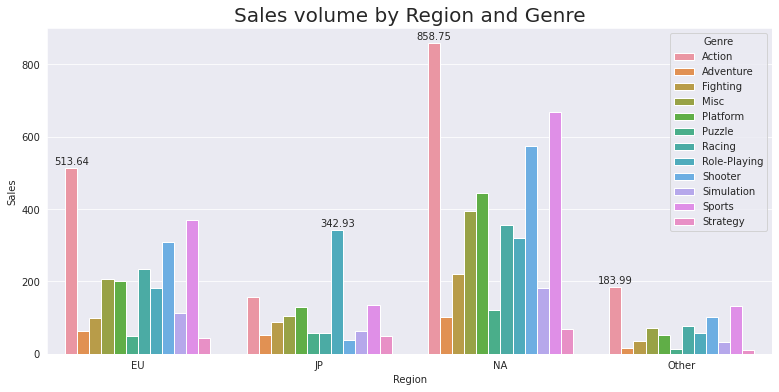

In [30]:
# 지역별 장르별 총 출고량 및 장르별 총 출고량 막대그래프 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(13,6))
sns.barplot(data=R_G_S, x='Region',y='Sales',hue='Genre',ci=None)#,hue_order=['NA', 'EU', 'JP','Other'],)
ax.set_title('Sales volume by Region and Genre',size=20)

top = list(R_G_S.sort_values(['Region','Sales'],ascending=False).reset_index(drop=True)[::12].sort_values('Region')['Sales'])
for p in ax.patches:
  if p.get_height() in top:
      ax.annotate('%.2f'% p.get_height(),(p.get_x()+p.get_width()/2.,p.get_height()-10),ha='center',va='center',fontsize=10,xytext=(0,10),textcoords='offset points')

* 북미, 유럽, 그외 지역에서는 Action>Sports>Shooter 장르 순으로, 일본은 롤플레잉>액션>스포츠 순서로 출고량이 높다.

## 4. 연도별 게임의 트렌드가 있을까

In [31]:
# 연도별 장르별 총 출고량
Y_G_S = df.groupby(['Year','Genre']).sum().reset_index()
Y_G_S

,Year,Genre,Sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.70
3,1980,Shooter,7.07
4,1981,Action,14.79
...,...,...,...
383,2016,Sports,14.63
384,2016,Strategy,0.52
385,2017,Action,0.01
386,2017,Role-Playing,0.04


In [32]:
# 연도별 가장 출고량이 높은 장르 추출
index_list=[]
for i in Y_G_S.Year.unique():
  condition = (Y_G_S['Sales']==max(Y_G_S.loc[Y_G_S['Year']==i,'Sales']))&(Y_G_S['Year']==i)
  index_list.append(Y_G_S.loc[condition].index[0])

Y_G_S2=pd.DataFrame(columns=Y_G_S.columns)
for i in range(len(index_list)):
  Y_G_S2 = pd.concat([Y_G_S2,Y_G_S.iloc[[index_list[i]],:]])
Y_G_S2

,Year,Genre,Sales
3,1980,Shooter,7.07
4,1981,Action,14.79
14,1982,Puzzle,10.04
21,1983,Platform,6.93
30,1984,Shooter,31.10
34,1985,Platform,43.17
39,1986,Action,13.74
47,1987,Fighting,5.42
53,1988,Platform,27.73
63,1989,Puzzle,37.75


In [33]:
# 2017년, 2020년 데이터가 매우 적으므로 제외
Y_G_S2 = Y_G_S2.reset_index().iloc[:37,]

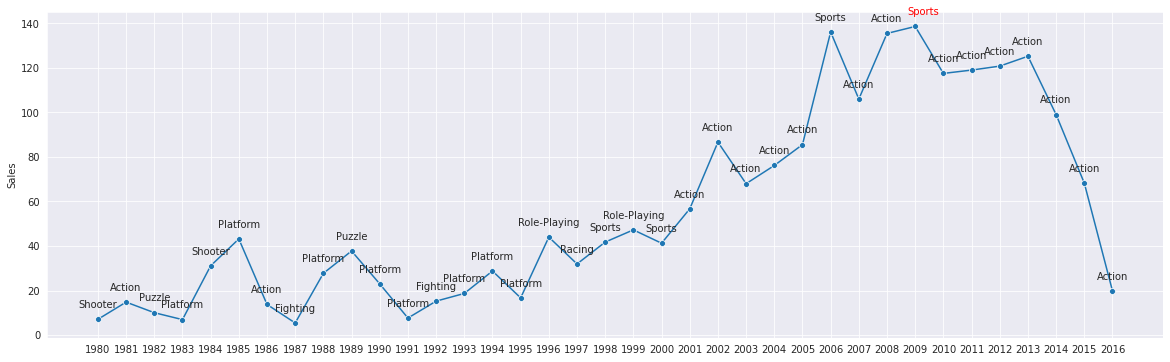

In [34]:
# 연도별 출고량 1위 장르 시각화
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20,6))
g = sns.lineplot(data=Y_G_S2['Sales'].reset_index(drop=True), sort = False, ax=ax, marker='o')
g.set_xticks(range(len(Y_G_S2)))
g.set_xticklabels(Y_G_S2['Year'].astype(int));

for i in range(len(Y_G_S2)):
  if g.lines[0].get_ydata()[i] == max(Y_G_S2['Sales']):
    ax.annotate(Y_G_S2.iloc[i,2],(g.lines[0].get_xdata()[i]+0.3,g.lines[0].get_ydata()[i]+2),ha='center',va='center',fontsize=10,xytext=(0,10),textcoords='offset points',color ='red')
  else :
    ax.annotate(Y_G_S2.iloc[i,2],(g.lines[0].get_xdata()[i],g.lines[0].get_ydata()[i]+2),ha='center',va='center',fontsize=10,xytext=(0,10),textcoords='offset points')

* 2000년대 이전에는 스포츠와 플랫폼 장르가, 2000년대 이후에는 액션 장르가 우세함

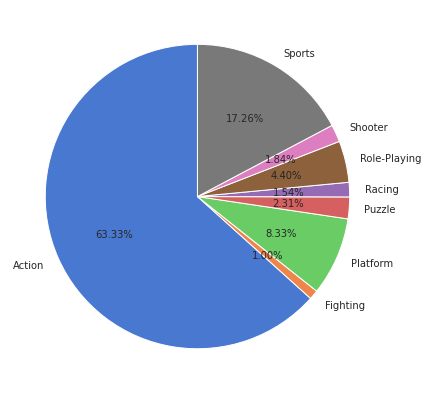

In [35]:
# 연도별 출고량 1위 장르들의 출고량 비교
plt.figure(figsize=(7,7))
colors = sns.color_palette('muted')
plt.pie(Y_G_S2.groupby('Genre').sum().reset_index()['Sales'],labels=(Y_G_S2.groupby('Genre').sum().reset_index()['Genre']),autopct='%0.2f%%', startangle = 90,colors=colors);

* 액션 장르가 63.33퍼센트로 연도별 출고량 Top1 장르 중 액션 장르의 출고량이 매우 높은 것을 알 수 있습니다.

## 5. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

Text(0.5, 1.0, 'Sales Top5')

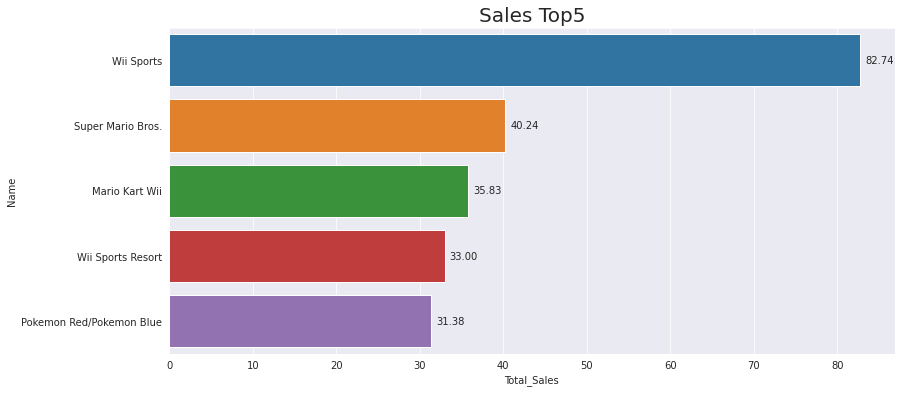

In [36]:
# 총 출고량 top5 게임
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(13,6))
sns.barplot(data=data.sort_values('Total_Sales',ascending=False)[:5], x='Total_Sales',y='Name',ci=None)

for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
ax.set_title('Sales Top5',size=20)

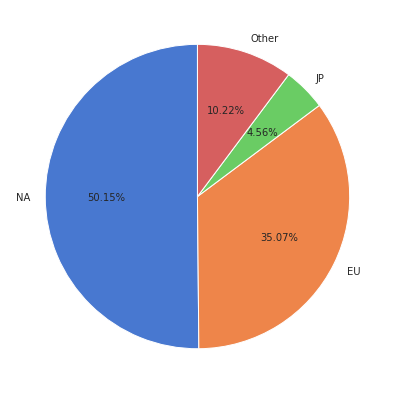

In [37]:
# 1위 게임인 wii sports 지역별 출고량
plt.figure(figsize=(7,7))
colors = sns.color_palette('muted')
plt.pie(df.loc[df['Name']=='Wii Sports']['Sales'],labels=(df.loc[df['Name']=='Wii Sports']['Region']),autopct='%0.2f%%', startangle = 90,colors=colors);

* Wii Sports가 1위이며, 북미지역의 출고량이 50%, 유럽지역이 35%를 차지한다.

### 출고량 TOP 100 게임 분석



In [38]:
tsales_top_100 = data.sort_values('Total_Sales',ascending=False)[:100]
tsales_top_100

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2855,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4113,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12316,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3288,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7673,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
12581,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.44
10718,Call of Duty: World at War,X360,2008,Shooter,Activision,4.79,1.90,0.00,0.69,7.38
7852,Battlefield 3,X360,2011,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34
1021,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.32


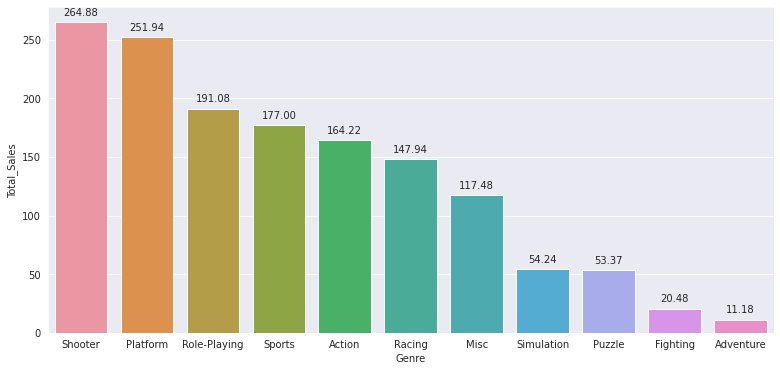

In [39]:
# 출고량 Top 100 게임 장르별 출고량
ts100_G = tsales_top_100.groupby('Genre').sum().sort_values('Total_Sales',ascending=False).reset_index().drop(columns=['Year'])

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(13,6))
sns.barplot(data=ts100_G, x='Genre',y='Total_Sales',ci=None)
for p in ax.patches:
  ax.annotate('%.2f'% p.get_height(),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',fontsize=10,xytext=(0,10),textcoords='offset points')

* Shooter > Platform > Role-Playing 순서로 출고량이 높다.

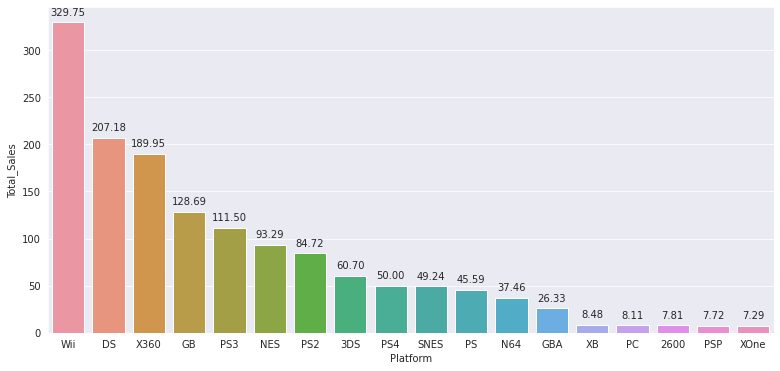

In [40]:
# 출고량 Top 100 게임 플랫폼별 출고량
ts100_P = tsales_top_100.groupby('Platform').sum().sort_values('Total_Sales',ascending=False).reset_index().drop(columns=['Year'])

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(13,6))
sns.barplot(data=ts100_P, x='Platform',y='Total_Sales',ci=None)
for p in ax.patches:
  ax.annotate('%.2f'% p.get_height(),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',fontsize=10,xytext=(0,10),textcoords='offset points')

* Wii > DS > X360 순서로 출고량이 높다.

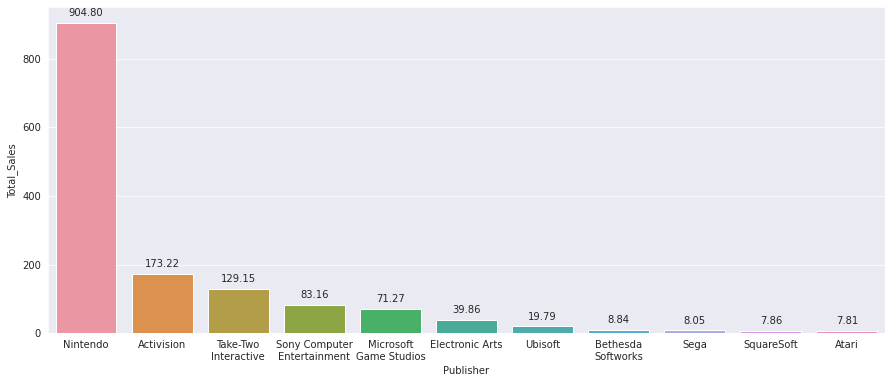

In [41]:
# 출고량 Top 100 게임 제작 회사별 출고량
ts100_P2 = tsales_top_100.groupby('Publisher').sum().sort_values('Total_Sales',ascending=False).reset_index().drop(columns=['Year'])

label = ['Nintendo','Activision','Take-Two\nInteractive','Sony Computer\nEntertainment','Microsoft\nGame Studios','Electronic Arts','Ubisoft','Bethesda\nSoftworks','Sega','SquareSoft','Atari']
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(15,6))
g = sns.barplot(data=ts100_P2, x='Publisher',y='Total_Sales',ci=None)
g.set_xticklabels(label)
for p in ax.patches:
  ax.annotate('%.2f'% p.get_height(),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',fontsize=10,xytext=(0,10),textcoords='offset points')

* Nintendo가 출고량이 압도적으로 높으며, Activision > Take-Two Interactive 순서로 높다.